# Import

In [1]:
from sympy import *
init_printing()

import numpy as np
import math

import random as rnd

import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import rc
#plt.rc('text', usetex=True)
#plt.rc('font', familiy='serif')
%matplotlib inline

In [2]:
#mass values [MeV]
m_K  = 493.677
m_pi = 139.571
m_mu = 105.658

#HNL mass
m_4 = symbols('m_4', real=True)

# Production KDAR

Production channel: $K^+ \to N + \mu^+$ (Kaon Decay-At-Rest)

In [3]:
#Produced HNL energy

E_N = (m_K**2 - m_mu**2 + m_4**2)/(2*m_K)

mass_range = np.linspace(105.658 + 139.571, 390, 1000)
#Energy = lambdify( m_4, E_N.subs(m_4, mass_range), "numpy" )

# CM frame

In [4]:
# Energy of products in HNL CM frame

E0_pi = (m_4**2 - m_mu**2 + m_pi**2)/(2*m_4)
E0_mu = (m_4**2 + m_mu**2 - m_pi**2)/(2*m_4)

#Energy0_pi = lambdify( m_4, E0_pi.subs(m_4, mass_range), "numpy" )
#Energy0_mu = lambdify( m_4, E0_mu.subs(m_4, mass_range), "numpy" )

In [5]:
# Absolute values of 3-momentums

P0_pi = (E0_pi**2 - m_pi**2)**0.5

P0_mu = (E0_mu**2 - m_mu**2)**0.5

# Lab frame

In [6]:
theta= symbols('theta', real=True)
# There is a rotation symmetry around the beam (phi)

In [7]:
# boost factor
gamma = E_N/m_4
gb = -((E_N/m_4)**2 - 1)**0.5

In [8]:
# Energies and momentums

Elab_pi = gamma*E0_pi - gb*P0_pi*cos(theta)
Pzlab_pi= -gb * E0_pi + gamma*P0_pi*cos(theta)

Elab_mu = gamma*E0_mu + gb*P0_mu*cos(theta)
Pzlab_mu= -gb * E0_mu - gamma*P0_mu*cos(theta)

In [9]:
#Angles

An_mu = acos(Pzlab_mu/(Elab_mu**2 - m_mu**2)**(1/2))
An_pi = acos(Pzlab_pi/(Elab_pi**2 - m_pi**2)**(1/2))

An_mp = acos((Pzlab_pi*Pzlab_mu - P0_pi*P0_mu*sin(theta)**2) /(Elab_mu**2-m_mu**2)**(1/2)/(Elab_pi**2-m_pi**2)**(1/2))

# Data simulation

In [10]:
#rnd.seed(23)
mass_N = [250,277,300,350,385] #selected values


# where to save values
Evmu = []
Evpi = []
ang_mupi = []
ang_lead = []
ang_mu = []
ang_pi = []



for i in range(10000): #here the number of events
    ang = math.acos(1-2*rnd.random())
    Em =  [0.,0.,0.,0.,0.]
    Ep =  [0.,0.,0.,0.,0.]
    Am =  [0.,0.,0.,0.,0.]
    Ap =  [0.,0.,0.,0.,0.]
    Amp = [0.,0.,0.,0.,0.]
    Ale = [0.,0.,0.,0.,0.]
    for j in range(len(mass_N)):
        Em[j] = float(Elab_mu.subs(m_4,mass_N[j]).subs(theta,ang))
        Ep[j] = float(Elab_pi.subs(m_4,mass_N[j]).subs(theta,ang))
        Am[j] = float(An_mu.subs(m_4,mass_N[j]).subs(theta,ang))
        Ap[j] = float(An_pi.subs(m_4,mass_N[j]).subs(theta,ang))
        Amp[j]= float(An_mp.subs(m_4,mass_N[j]).subs(theta,ang))
        if Em[j]>Ep[j]:
            Ale[j] = Am[j]
        else:
            Ale[j] = Ap[j]
            
    Evmu.append(Em)
    Evpi.append(Ep)
    ang_mupi.append(Amp)
    ang_lead.append(Ale)
    ang_mu.append(Am)
    ang_pi.append(Ap)
    
    
# Convert list to array: Array[Event, Mass]
Evmu = np.array(Evmu)
Evpi = np.array(Evpi)
ang_mupi = np.array(ang_mupi)
ang_lead = np.array(ang_lead)
ang_mu = np.array(ang_mu)
ang_pi = np.array(ang_pi)

# Representation

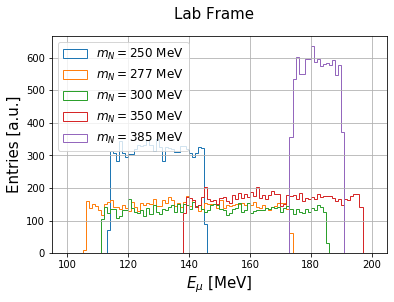

In [11]:
r=(100,200)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True) 

ax.hist(Evmu[:,0], bins=100, range=r, histtype='step', label=r'$m_N=250$ MeV')
ax.hist(Evmu[:,1], bins=100, range=r, histtype='step', label=r'$m_N=277$ MeV')
ax.hist(Evmu[:,2], bins=100, range=r, histtype='step', label=r'$m_N=300$ MeV')
ax.hist(Evmu[:,3], bins=100, range=r, histtype='step', label=r'$m_N=350$ MeV')
ax.hist(Evmu[:,4], bins=100, range=r, histtype='step', label=r'$m_N=385$ MeV')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$E_\mu$ [MeV]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'Lab Frame', fontsize = 15)
ax.legend(loc=2, fontsize = 12);
plt.show()

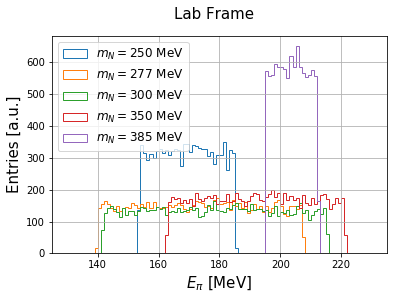

In [12]:
r=(130,230)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True)

ax.hist(Evpi[:,0],bins=100,range=r,histtype='step',label=r'$m_N=250$ MeV')
ax.hist(Evpi[:,1],bins=100,range=r,histtype='step',label=r'$m_N=277$ MeV')
ax.hist(Evpi[:,2],bins=100,range=r,histtype='step',label=r'$m_N=300$ MeV')
ax.hist(Evpi[:,3],bins=100,range=r,histtype='step',label=r'$m_N=350$ MeV')
ax.hist(Evpi[:,4],bins=100,range=r,histtype='step',label=r'$m_N=385$ MeV')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$E_\pi$ [MeV]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'Lab Frame', fontsize = 15)
ax.legend(loc=2, fontsize = 12)
plt.show()

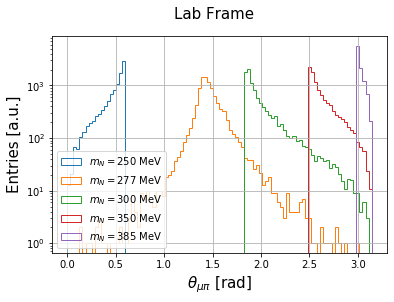

In [13]:
r=(0,math.pi)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True)
plt.yscale('log')

ax.hist(ang_mupi[:,0], bins=100, range=r, histtype='step', label=r'$m_N=250$ MeV')
ax.hist(ang_mupi[:,1], bins=100, range=r, histtype='step', label=r'$m_N=277$ MeV')
ax.hist(ang_mupi[:,2], bins=100, range=r, histtype='step', label=r'$m_N=300$ MeV')
ax.hist(ang_mupi[:,3], bins=100, range=r, histtype='step', label=r'$m_N=350$ MeV')
ax.hist(ang_mupi[:,4], bins=100, range=r, histtype='step', label=r'$m_N=385$ MeV')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$\theta_{\mu\pi}$ [rad]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'Lab Frame', fontsize = 15)
ax.legend(loc=3, fontsize = 10)
plt.show()

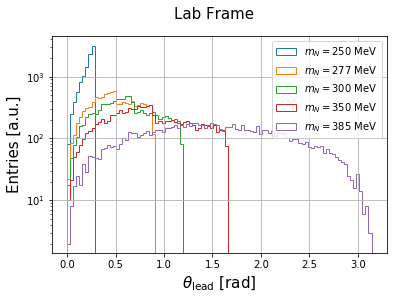

In [14]:
r=(0,math.pi)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True)
plt.yscale('log')

ax.hist(ang_lead[:,0], bins=100, range=r, histtype='step', label=r'$m_N=250$ MeV')
ax.hist(ang_lead[:,1], bins=100, range=r, histtype='step', label=r'$m_N=277$ MeV')
ax.hist(ang_lead[:,2], bins=100, range=r, histtype='step', label=r'$m_N=300$ MeV')
ax.hist(ang_lead[:,3], bins=100, range=r, histtype='step', label=r'$m_N=350$ MeV')
ax.hist(ang_lead[:,4], bins=100, range=r, histtype='step', label=r'$m_N=385$ MeV')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$\theta_{\rm{lead}}$ [rad]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'Lab Frame', fontsize = 15)
ax.legend(loc=1, fontsize = 10)
plt.show()

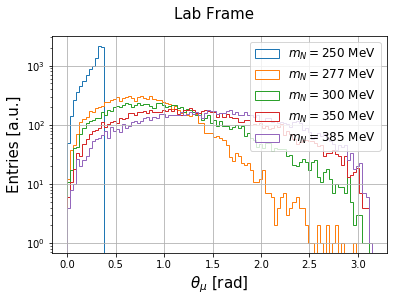

In [15]:
r=(0,math.pi)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True)
plt.yscale('log')

ax.hist(ang_mu[:,0], bins=100, range=r, histtype='step', label=r'$m_N=250$ MeV')
ax.hist(ang_mu[:,1], bins=100, range=r, histtype='step', label=r'$m_N=277$ MeV')
ax.hist(ang_mu[:,2], bins=100, range=r, histtype='step', label=r'$m_N=300$ MeV')
ax.hist(ang_mu[:,3], bins=100, range=r, histtype='step', label=r'$m_N=350$ MeV')
ax.hist(ang_mu[:,4], bins=100, range=r, histtype='step', label=r'$m_N=385$ MeV')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$\theta_\mu$ [rad]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'Lab Frame', fontsize = 15)
ax.legend(loc=1, fontsize = 12)
plt.show()

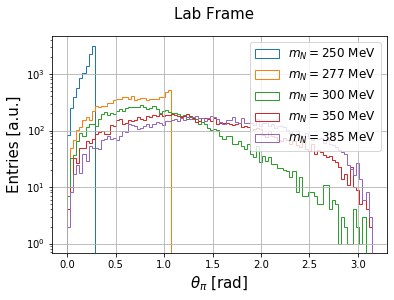

In [18]:
r=(0,math.pi)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True)
plt.yscale('log')

ax.hist(ang_pi[:,0], bins=100, range=r, histtype='step', label=r'$m_N=250$ MeV')
ax.hist(ang_pi[:,1], bins=100, range=r, histtype='step', label=r'$m_N=277$ MeV')
ax.hist(ang_pi[:,2], bins=100, range=r, histtype='step', label=r'$m_N=300$ MeV')
ax.hist(ang_pi[:,3], bins=100, range=r, histtype='step', label=r'$m_N=350$ MeV')
ax.hist(ang_pi[:,4], bins=100, range=r, histtype='step', label=r'$m_N=385$ MeV')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$\theta_\pi$ [rad]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'Lab Frame', fontsize = 15)
ax.legend(loc=1, fontsize = 12)
plt.show()

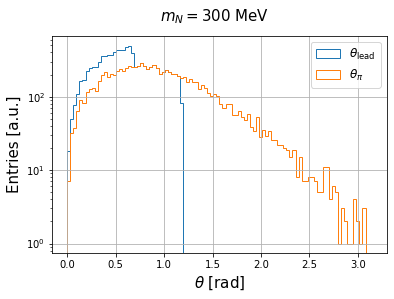

In [17]:
r=(0,math.pi)

fig, ax = plt.subplots(1, figsize=(6,4)) 
ax.grid(True)
plt.yscale('log')

ax.hist(ang_lead[:,2], bins=100, range=r, histtype='step', label=r'$\theta_{\rm{lead}}$')
ax.hist(ang_pi[:,2], bins=100, range=r, histtype='step', label=r'$\theta_\pi$')

x_min, x_max, y_min, y_max = ax.axis('tight') 
ax.axis([x_min, x_max, y_min, y_max]) 
ax.axes.xaxis.set_label_text(r'$\theta$ [rad]', fontdict={"size":15})
ax.axes.yaxis.set_label_text(r'Entries [a.u.]', fontdict={"size":15})

fig.suptitle(r'$m_N=300$ MeV', fontsize = 15)
ax.legend(loc=1, fontsize = 12)
plt.show()